In [1]:
# 1

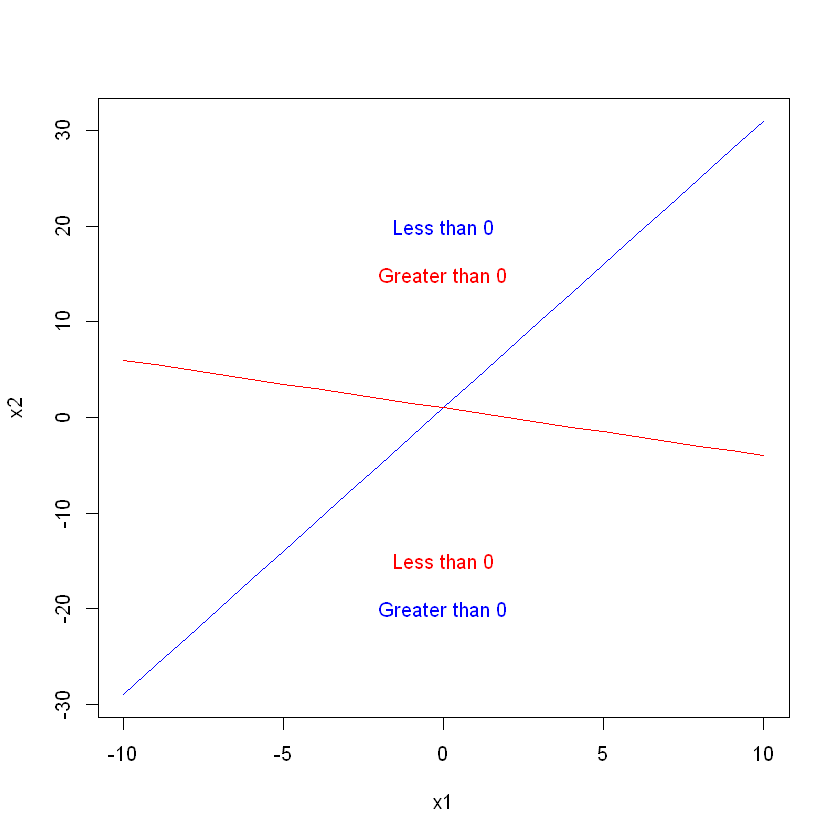

In [2]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "blue")
text(c(0), c(-20), "Greater than 0", col = "blue")
text(c(0), c(20), "Less than 0", col = "blue")
lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "red")
text(c(0), c(15), "Greater than 0", col = "red")

In [3]:
#2

In [4]:
#a

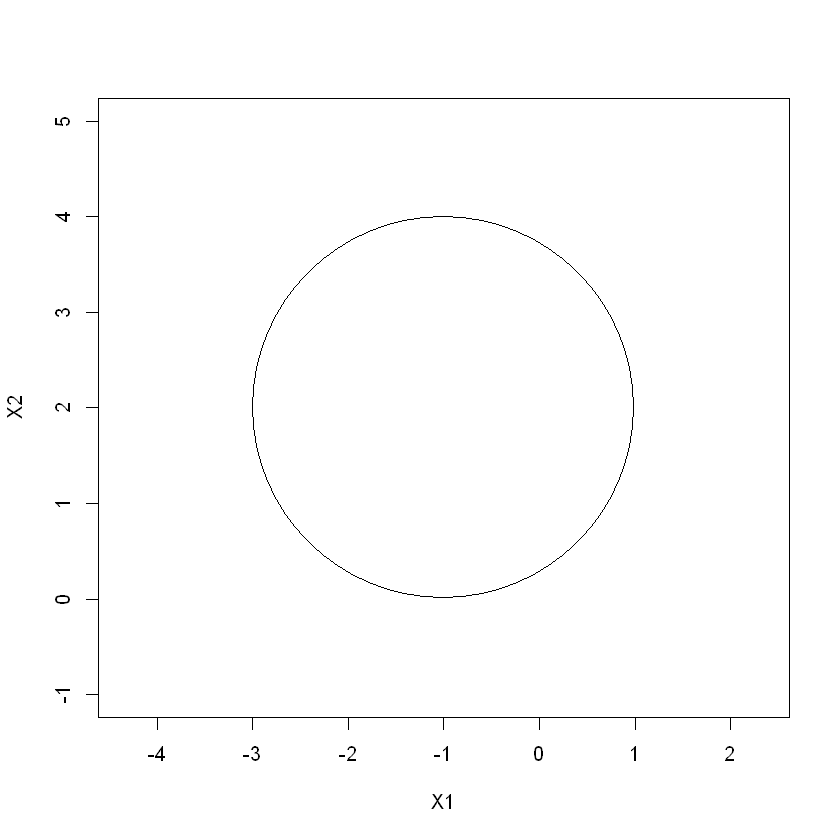

In [5]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

In [6]:
#b

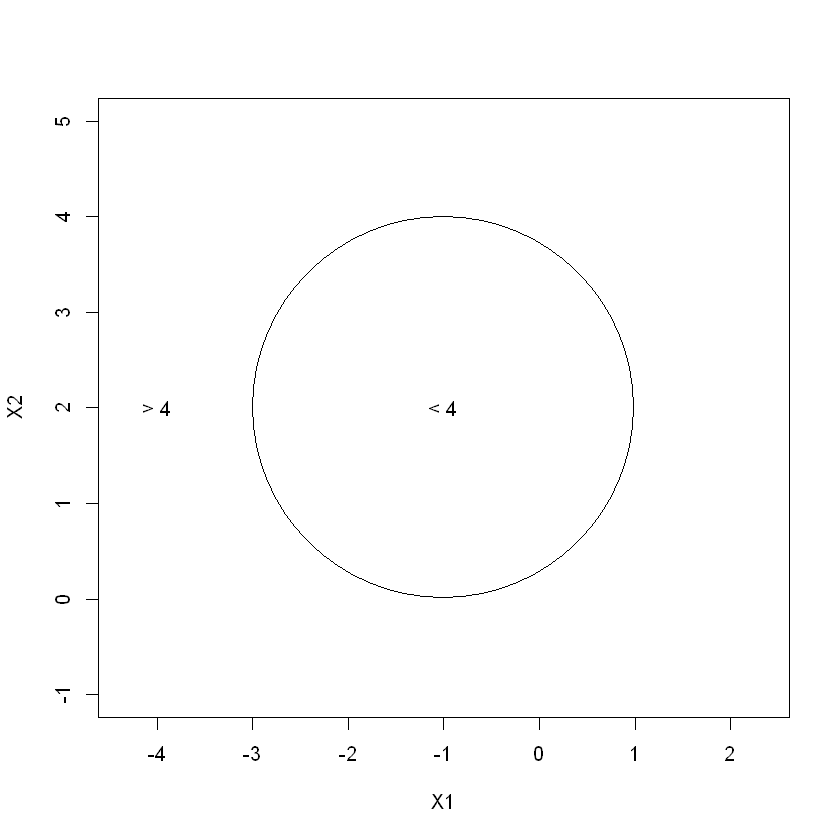

In [7]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

In [8]:
#c

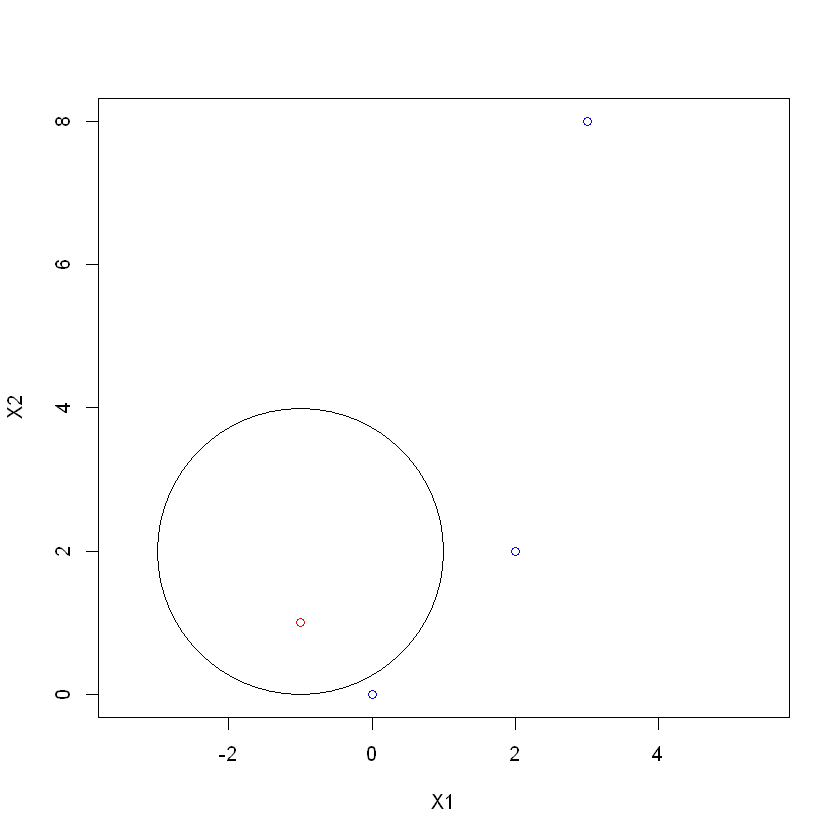

In [9]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

In [10]:
#d

In [11]:
# We can expand the equation of the decision boundary: (1+X1)2+(2−X2)2=4 by X21+X22+2X1−4X2+1=0
# this is linear in terms of X1, X21, X2 and x22.

In [12]:
#4

Warning message:
"package 'e1071' was built under R version 3.6.3"

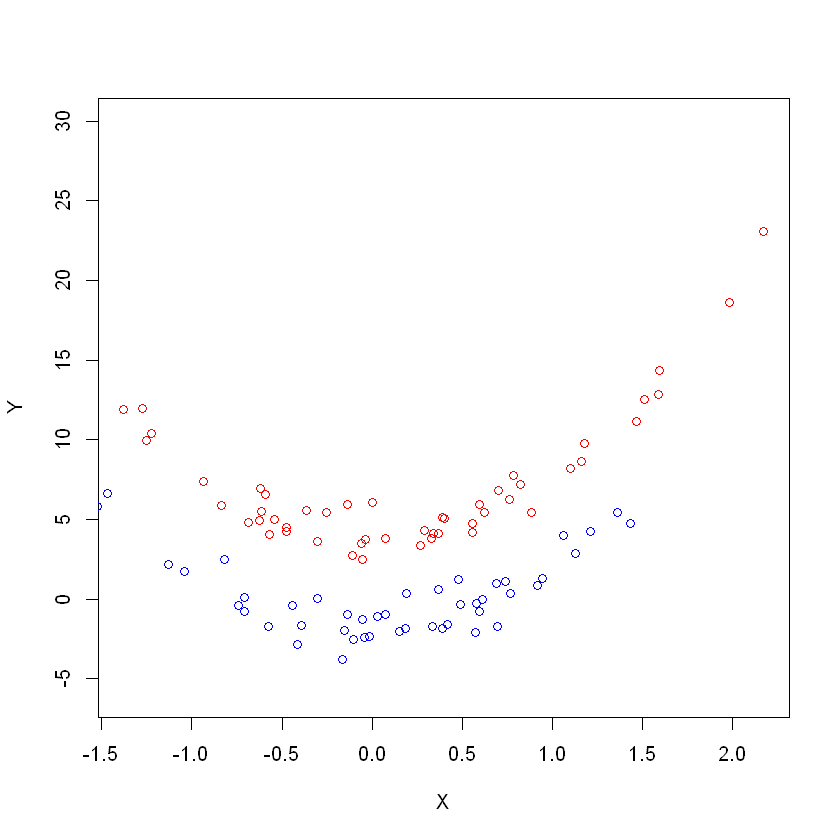

In [13]:
library(e1071)
set.seed(1)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "blue")

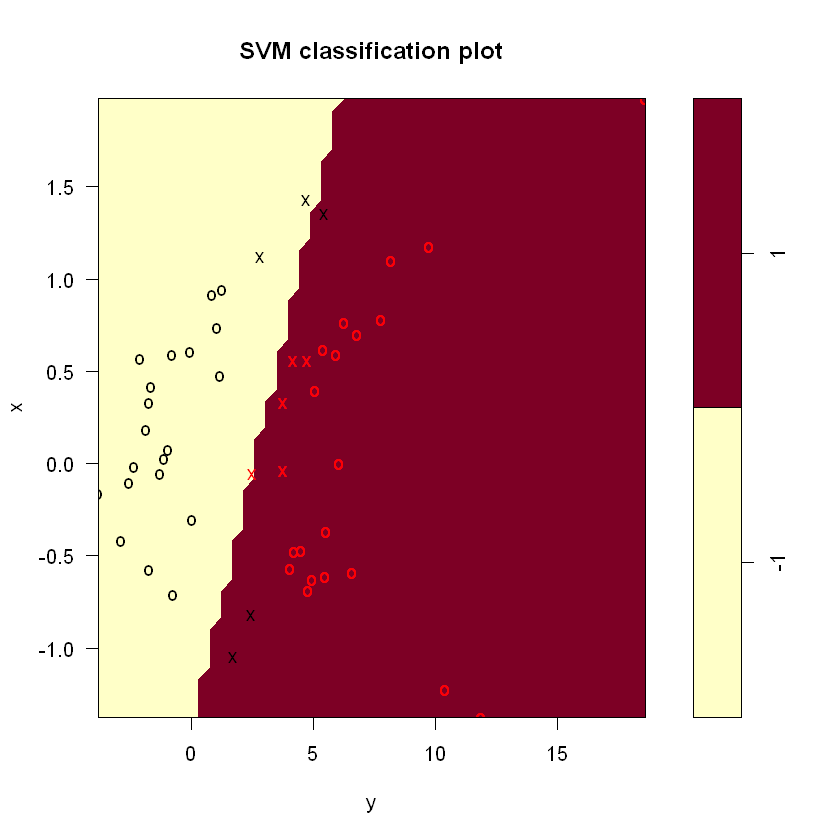

In [14]:
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [15]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 22  0
     1   3 25

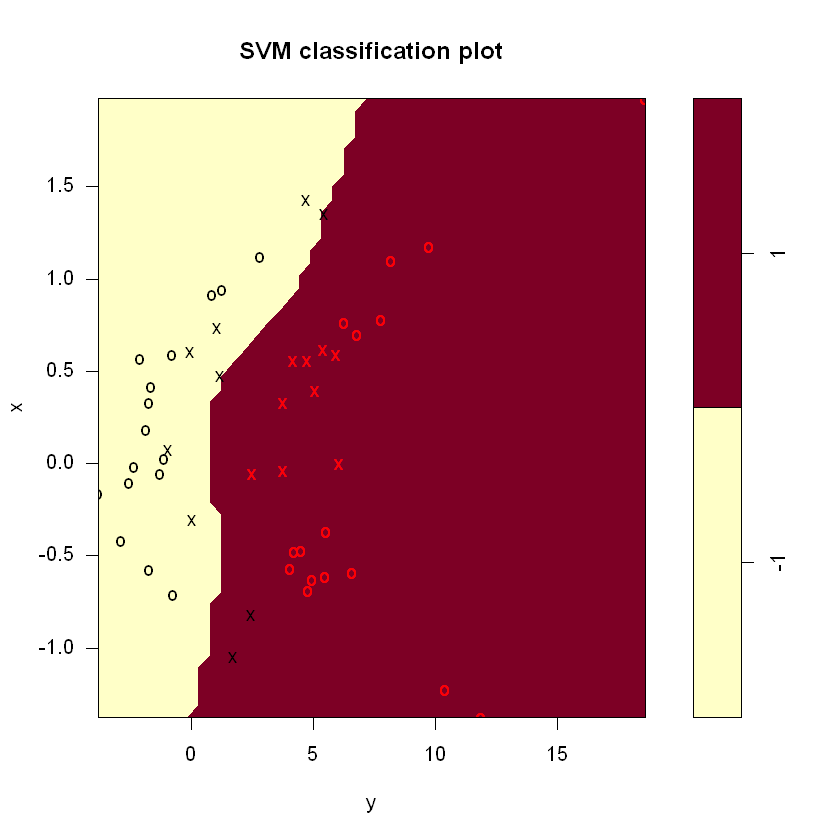

In [16]:
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [17]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 21  0
     1   4 25

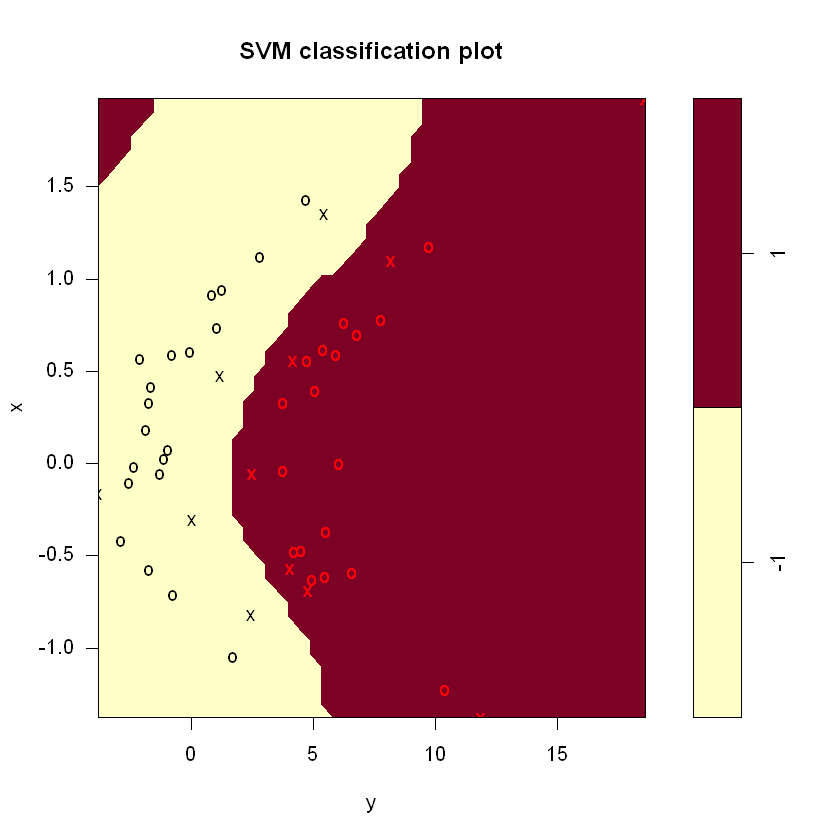

In [18]:
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [19]:
table(predict = predict(svm.radial, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 25  0
     1   0 25

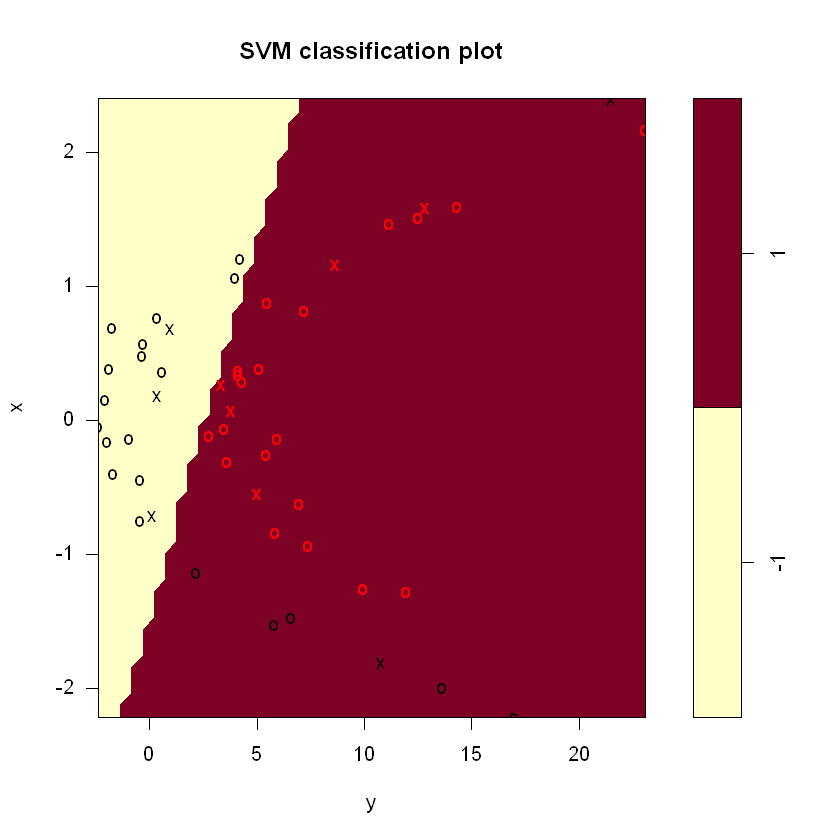

In [20]:
plot(svm.linear, data.test)

In [21]:
table(predict = predict(svm.linear, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 18  0
     1   7 25

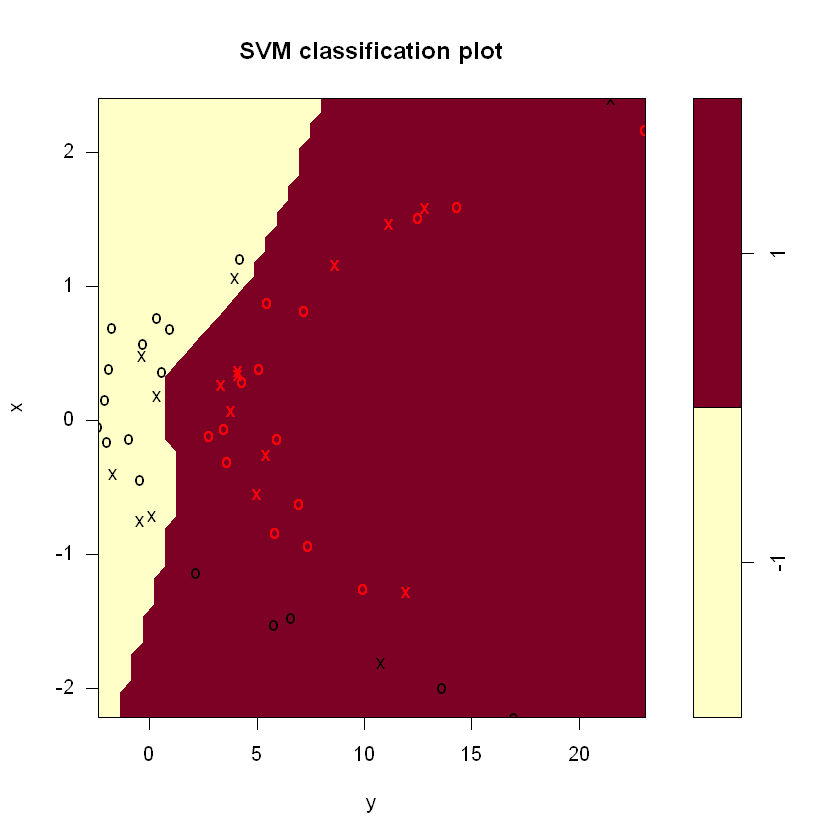

In [22]:
plot(svm.poly, data.test)

In [23]:
table(predict = predict(svm.poly, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 18  0
     1   7 25

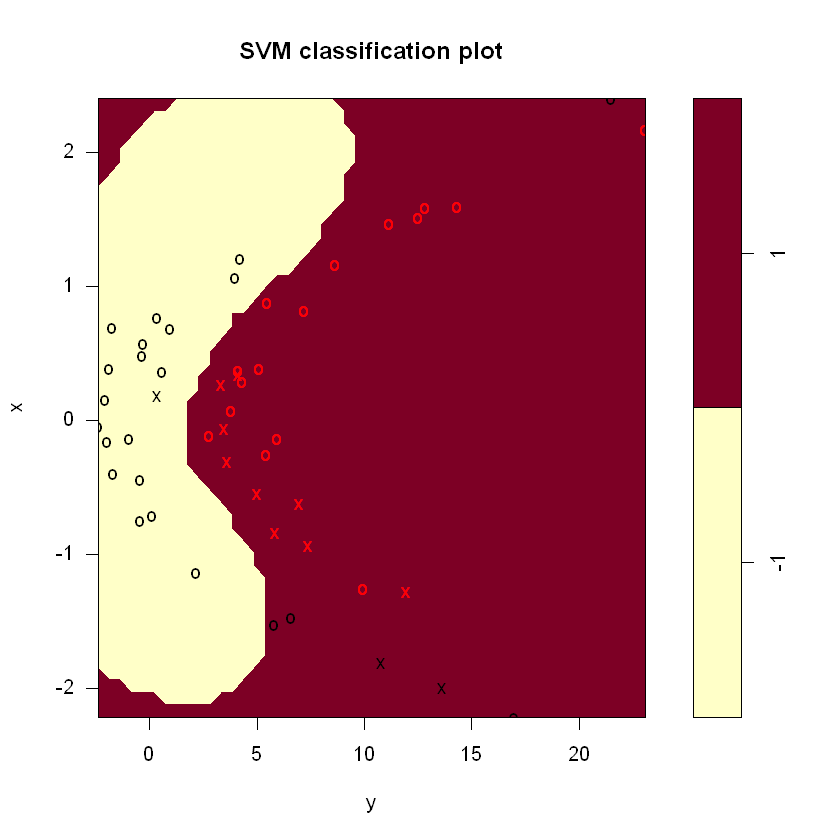

In [24]:
plot(svm.radial, data.test)

In [25]:
table(predict = predict(svm.radial, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 19  0
     1   6 25

In [26]:
#7

In [28]:
#a

In [27]:
library(ISLR)
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

In [29]:
#b

In [30]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07653846 0.03617137
2 1e-01 0.04596154 0.03378238
3 1e+00 0.01025641 0.01792836
4 5e+00 0.02051282 0.02648194
5 1e+01 0.02051282 0.02648194
6 1e+02 0.03076923 0.03151981
7 1e+03 0.03076923 0.03151981


In [31]:
#c

In [32]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3013462 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5511538 0.04366593
2  1e-01      2 0.5511538 0.04366593
3  1e+00      2 0.5511538 0.04366593
4  5e+00      2 0.5511538 0.04366593
5  1e+01      2 0.5130128 0.08963366
6  1e+02      2 0.3013462 0.09961961
7  1e-02      3 0.5511538 0.04366593
8  1e-01      3 0.5511538 0.04366593
9  1e+00      3 0.5511538 0.04366593
10 5e+00      3 0.5511538 0.04366593
11 1e+01      3 0.5511538 0.04366593
12 1e+02      3 0.3446154 0.09821588
13 1e-02      4 0.5511538 0.04366593
14 1e-01      4 0.5511538 0.04366593
15 1e+00      4 0.5511538 0.04366593
16 5e+00      4 0.5511538 0.04366593
17 1e+01      4 0.5511538 0.04366593
18 1e+02      4 0.5511538 0.04366593


In [33]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01282051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55115385 0.04366593
2  1e-01 1e-02 0.08929487 0.04382379
3  1e+00 1e-02 0.07403846 0.03522110
4  5e+00 1e-02 0.04852564 0.03303346
5  1e+01 1e-02 0.02557692 0.02093679
6  1e+02 1e-02 0.01282051 0.01813094
7  1e-02 1e-01 0.21711538 0.09865227
8  1e-01 1e-01 0.07903846 0.03874545
9  1e+00 1e-01 0.05371795 0.03525162
10 5e+00 1e-01 0.02820513 0.03299190
11 1e+01 1e-01 0.03076923 0.03375798
12 1e+02 1e-01 0.03583333 0.02759051
13 1e-02 1e+00 0.55115385 0.04366593
14 1e-01 1e+00 0.55115385 0.04366593
15 1e+00 1e+00 0.06384615 0.04375618
16 5e+00 1e+00 0.05884615 0.04020934
17 1e+01 1e+00 0.05884615 0.04020934
18 1e+02 1e+00 0.05884615 0.04020934
19 1e-02 5e+00 0.55115385 0.04366593
20 1e-01 5e+00 0.55115385 0.04366593
21 1e+00 5e+00 0.49493590 0.04724924
22

In [34]:
#d

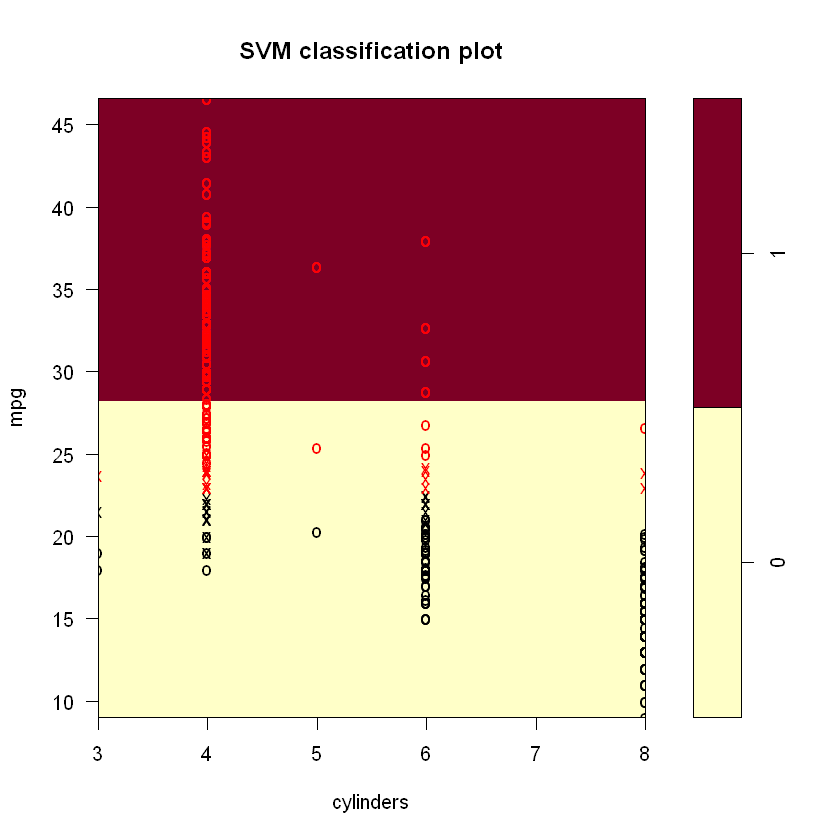

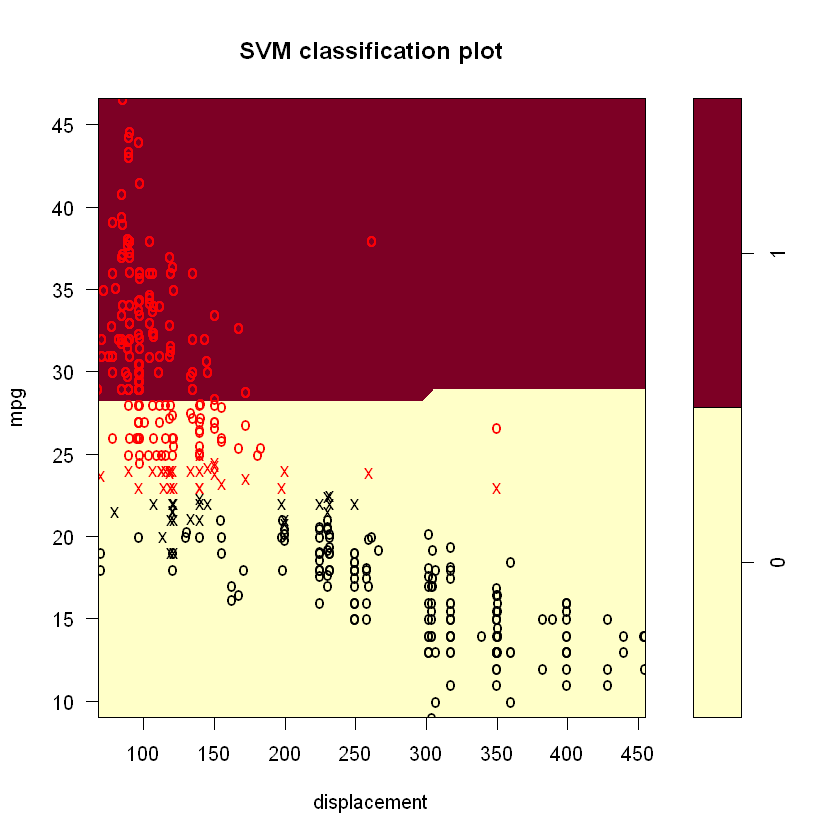

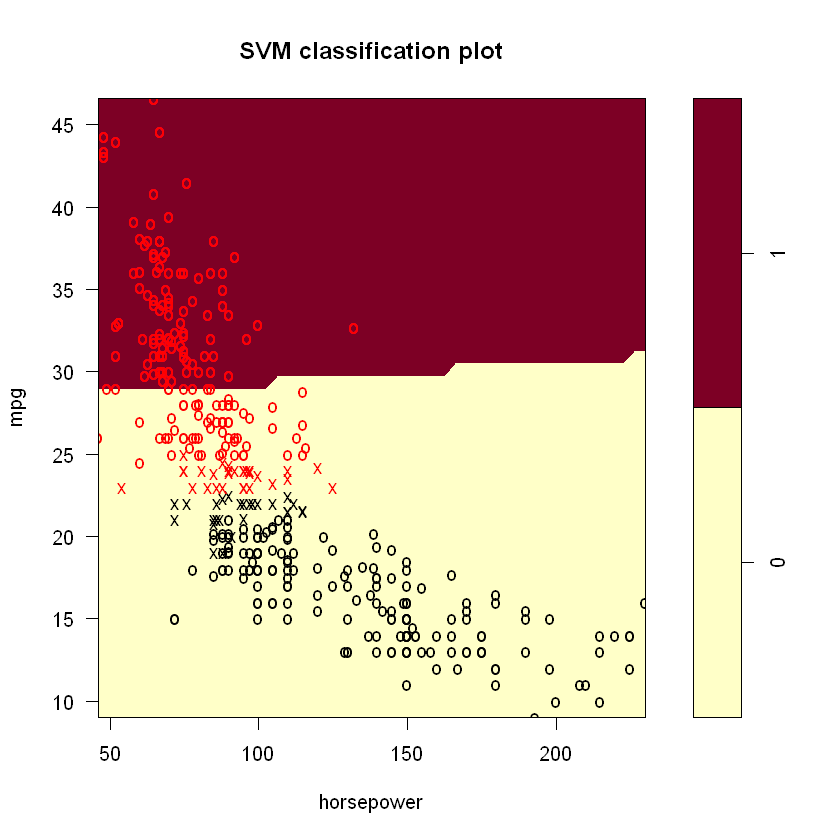

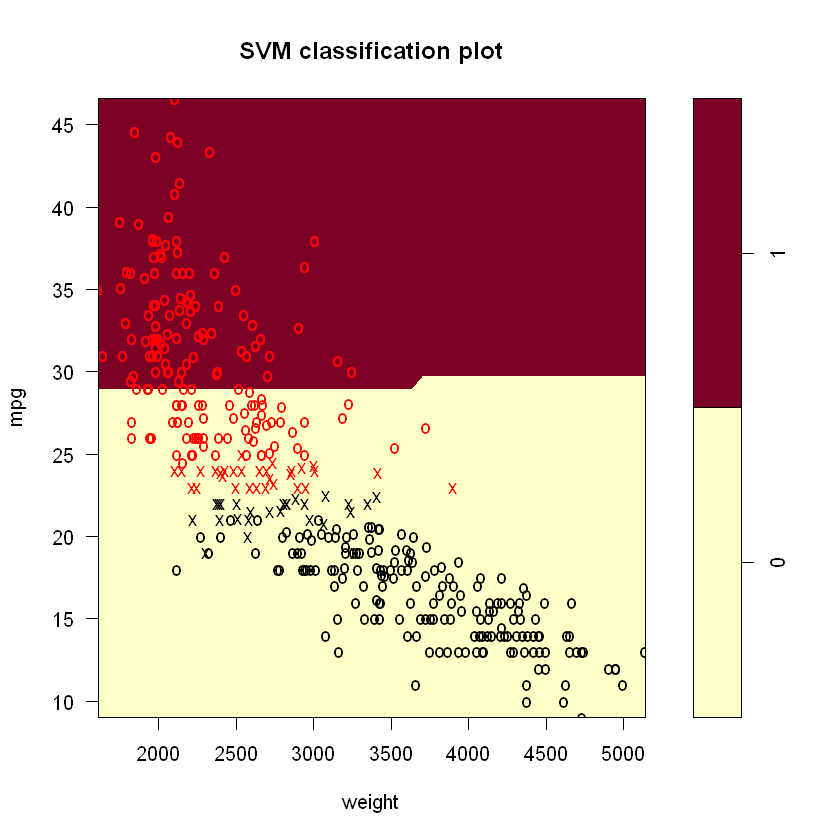

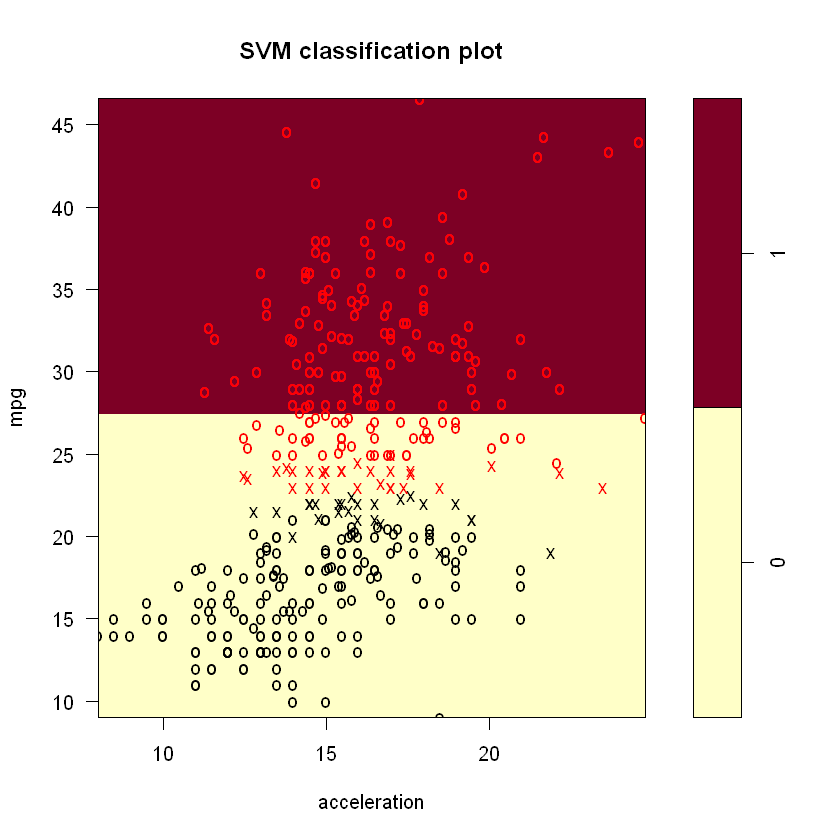

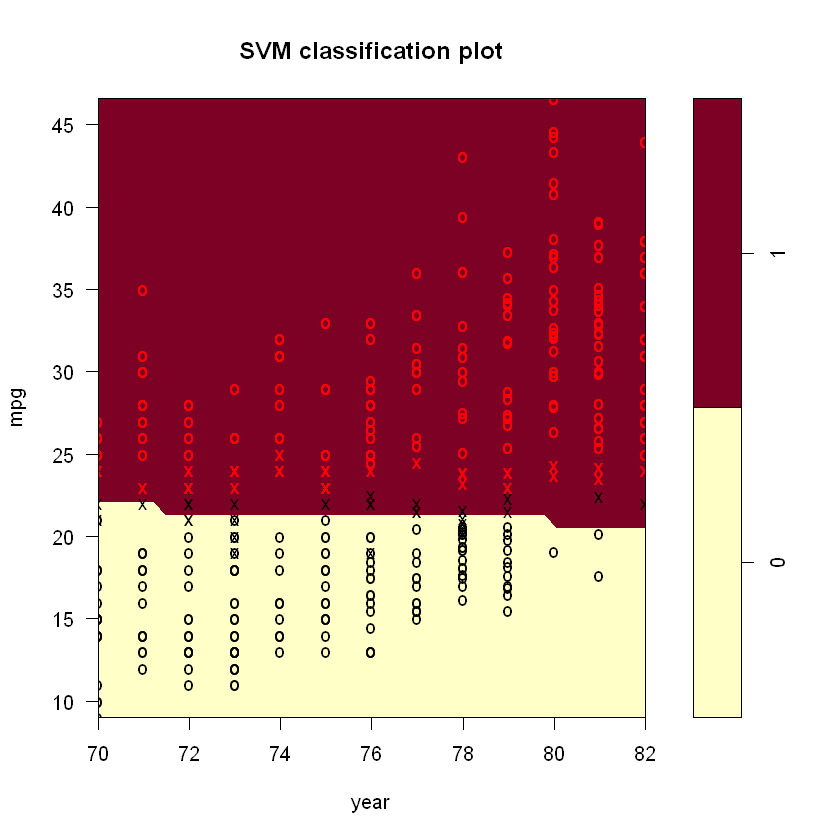

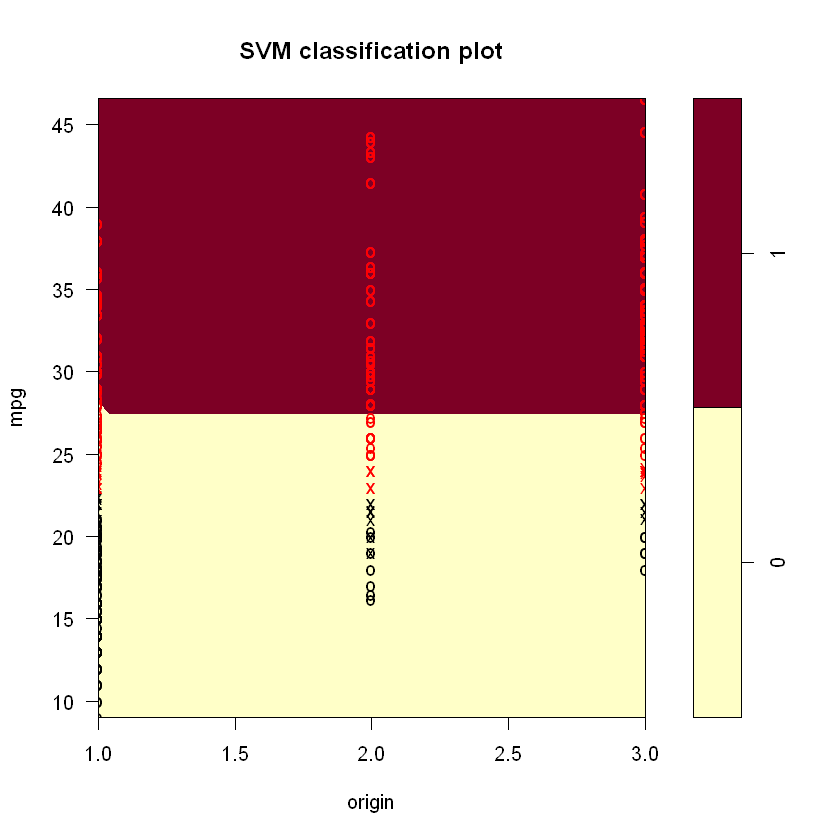

In [35]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

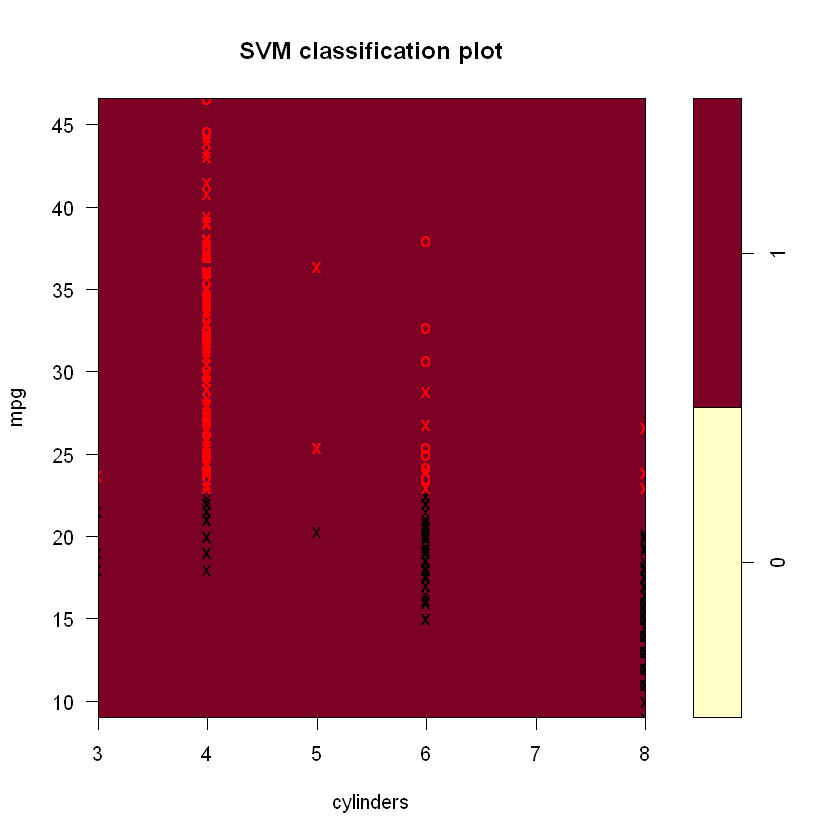

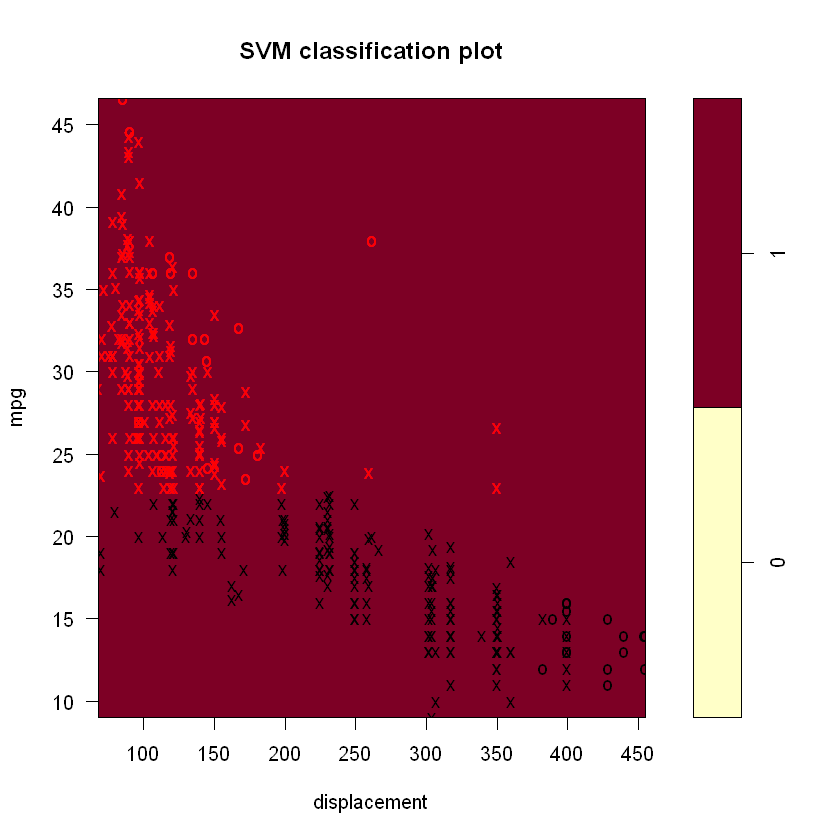

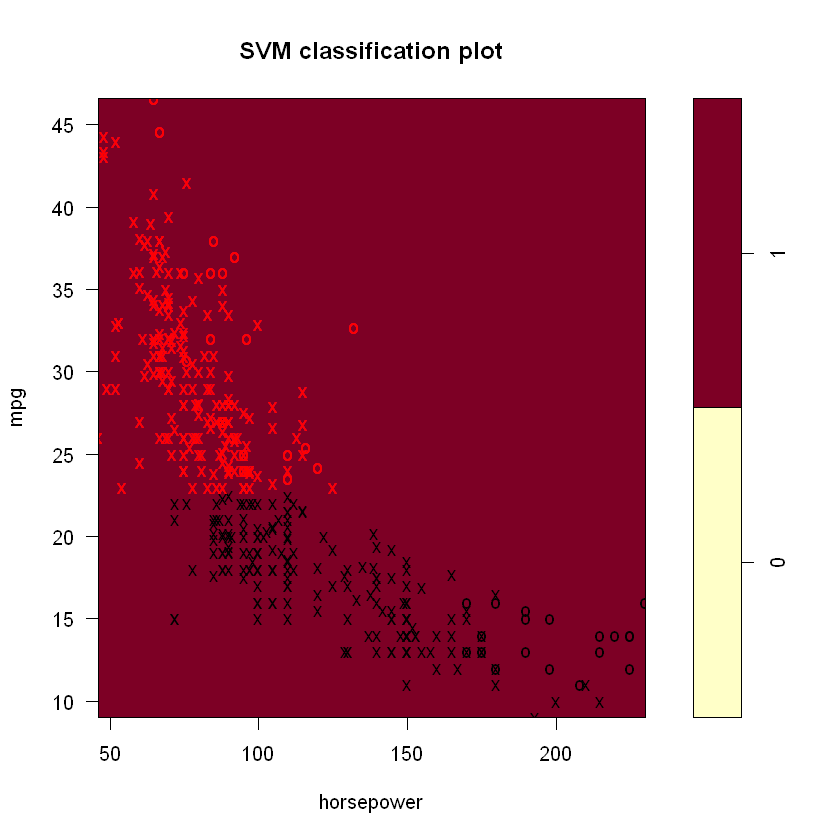

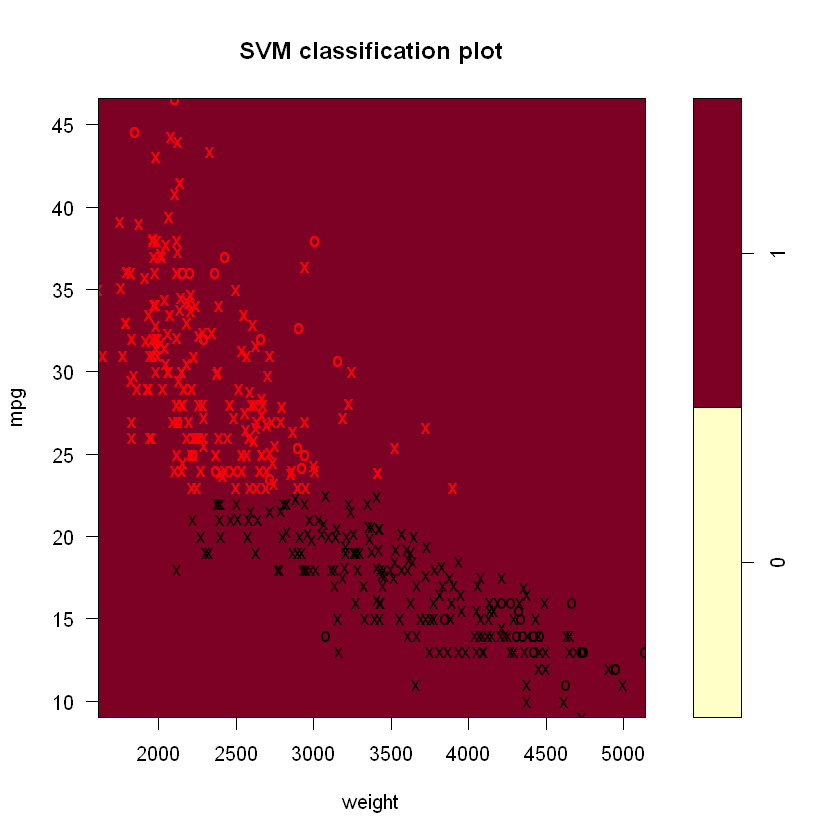

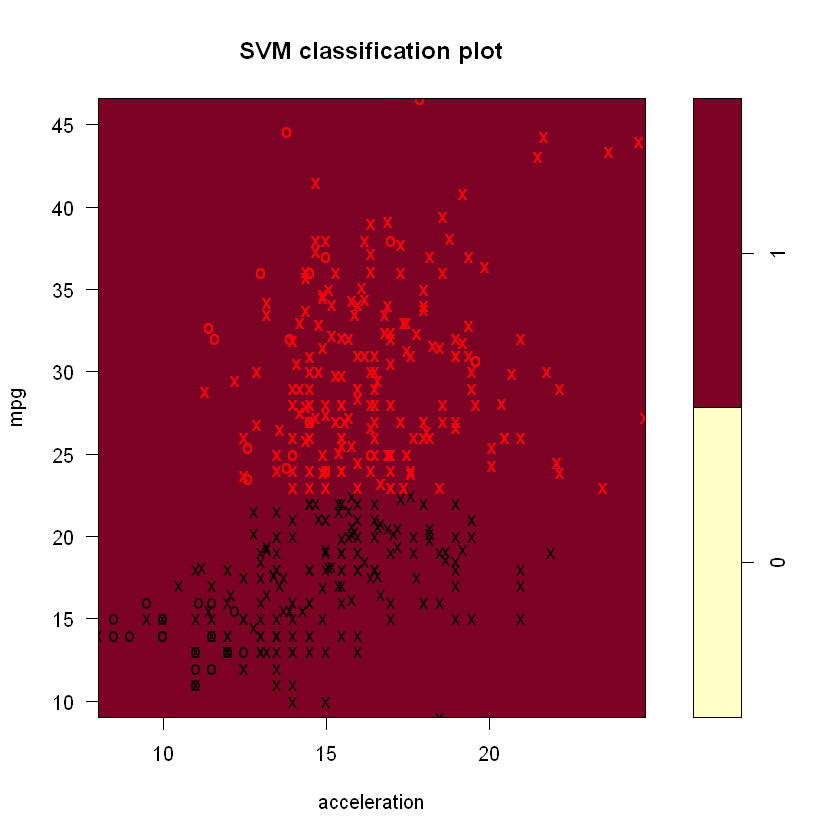

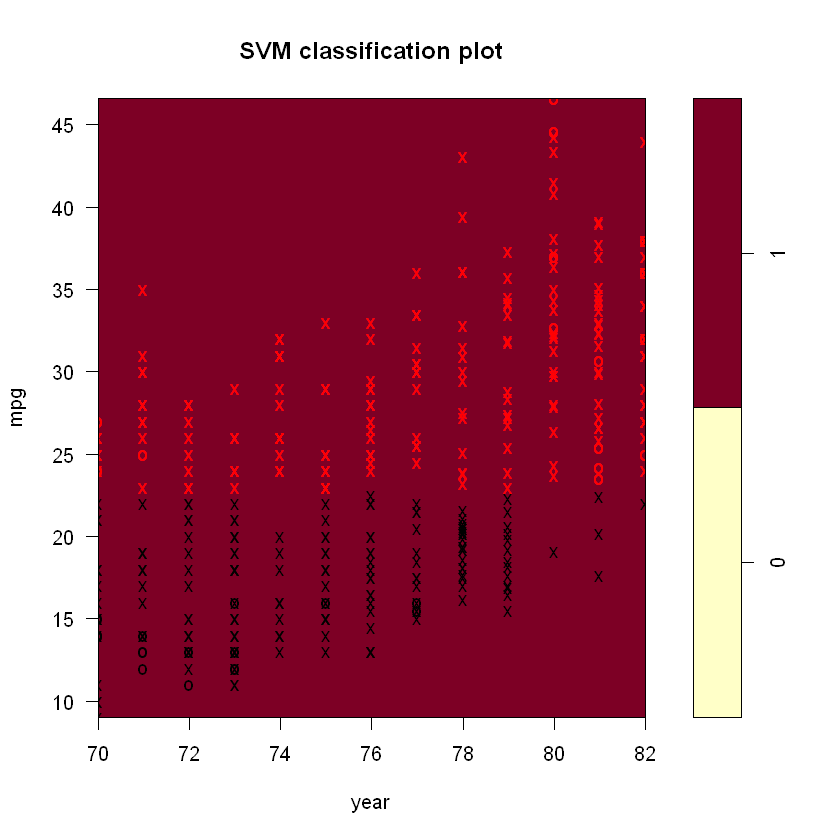

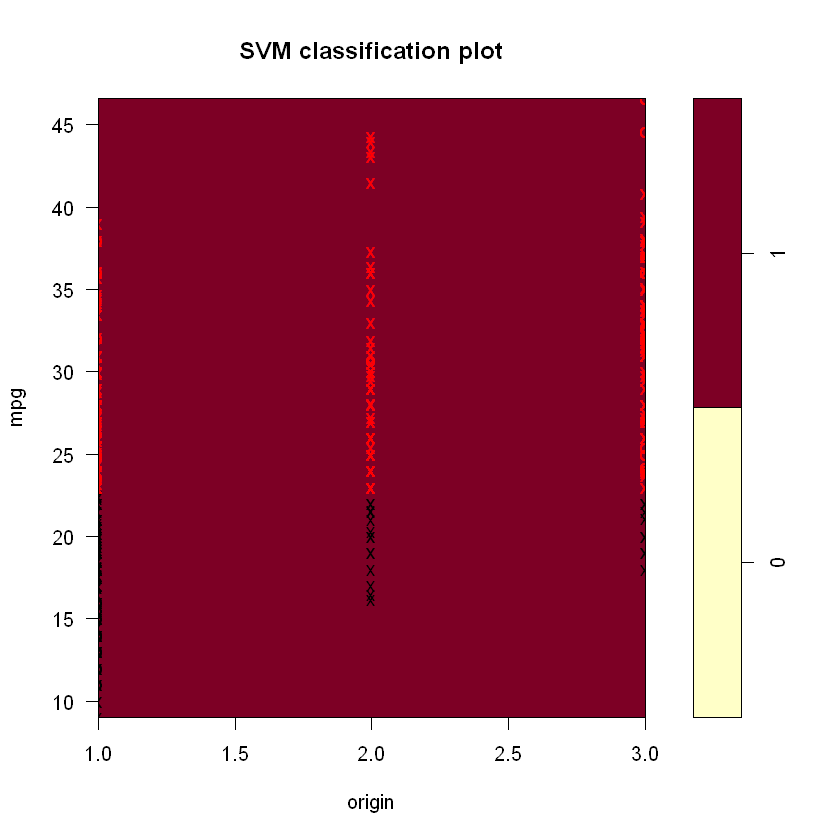

In [36]:
plotpairs(svm.poly)

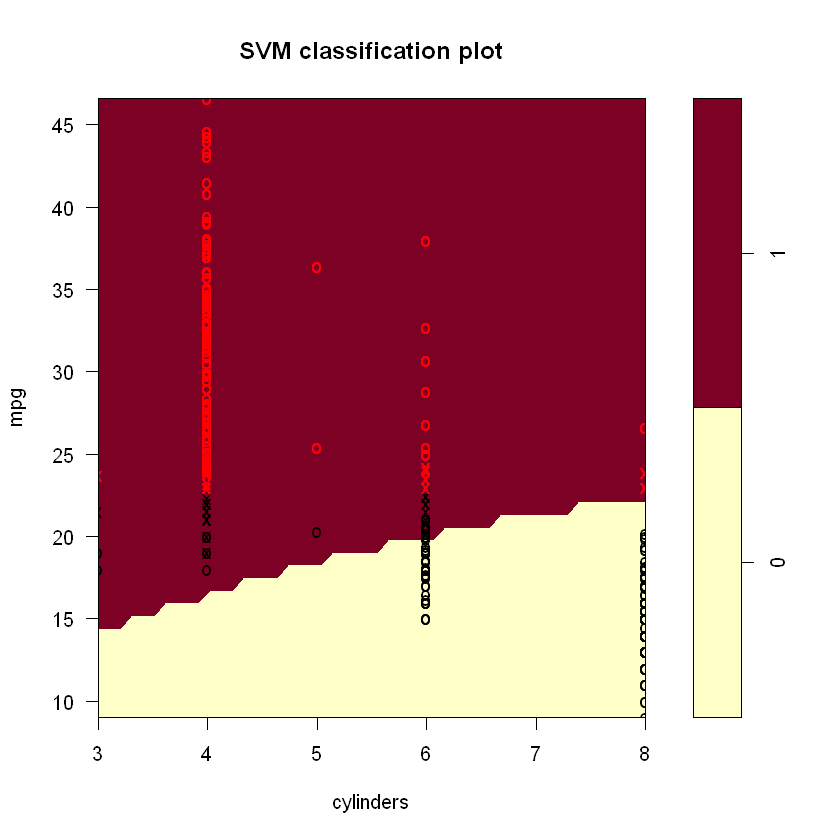

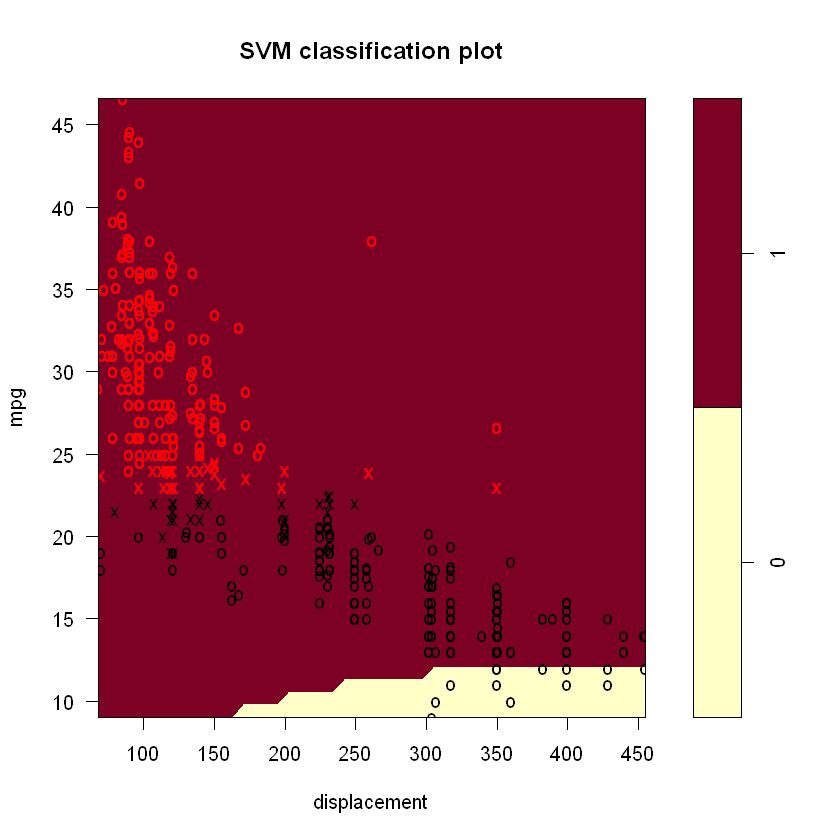

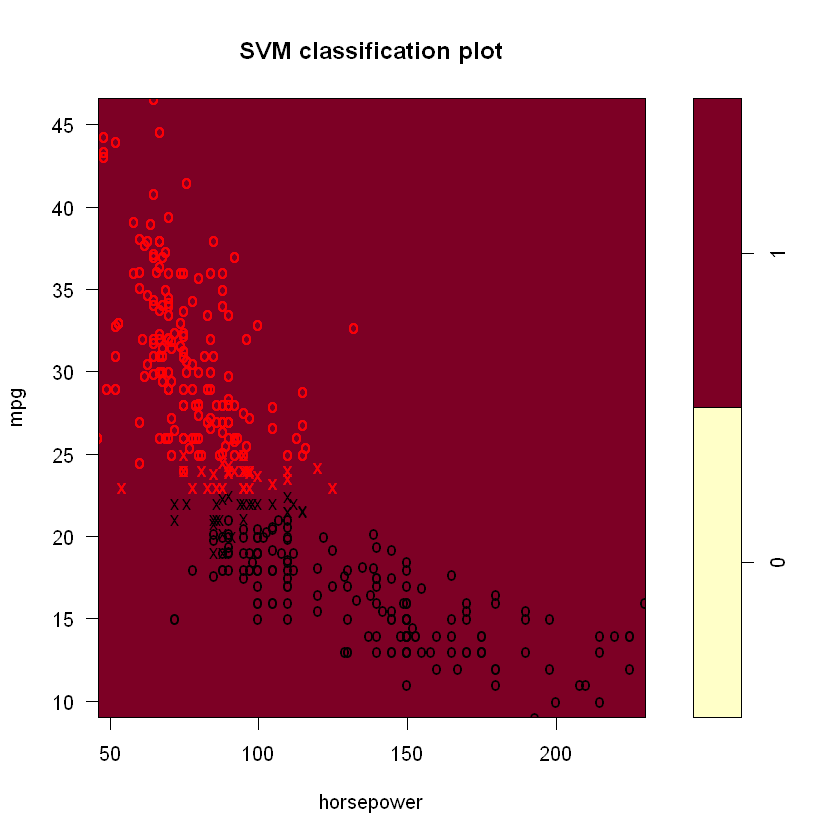

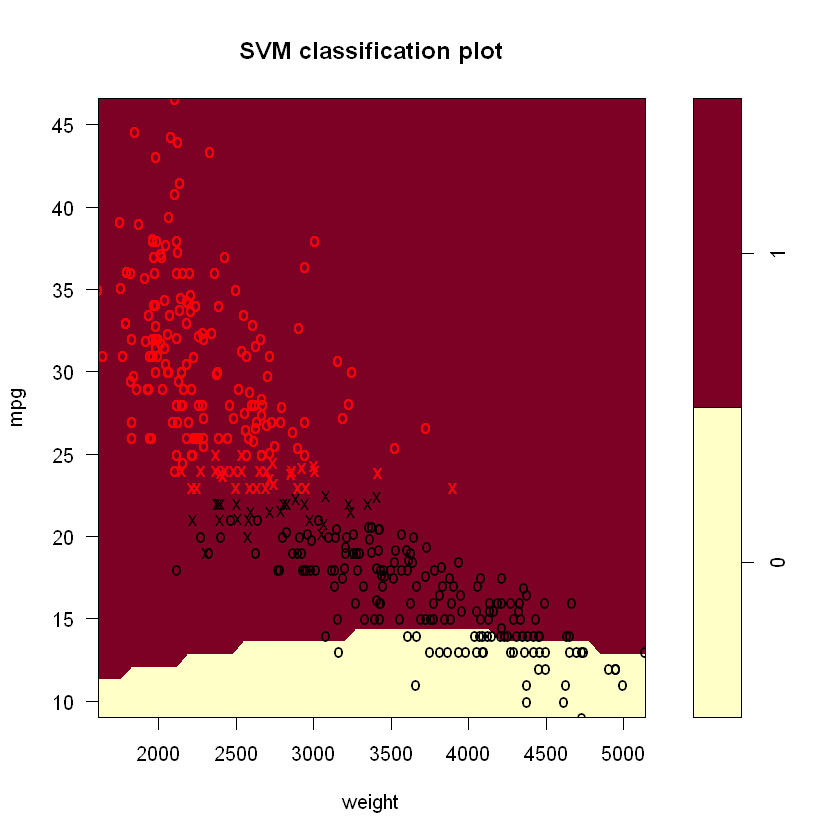

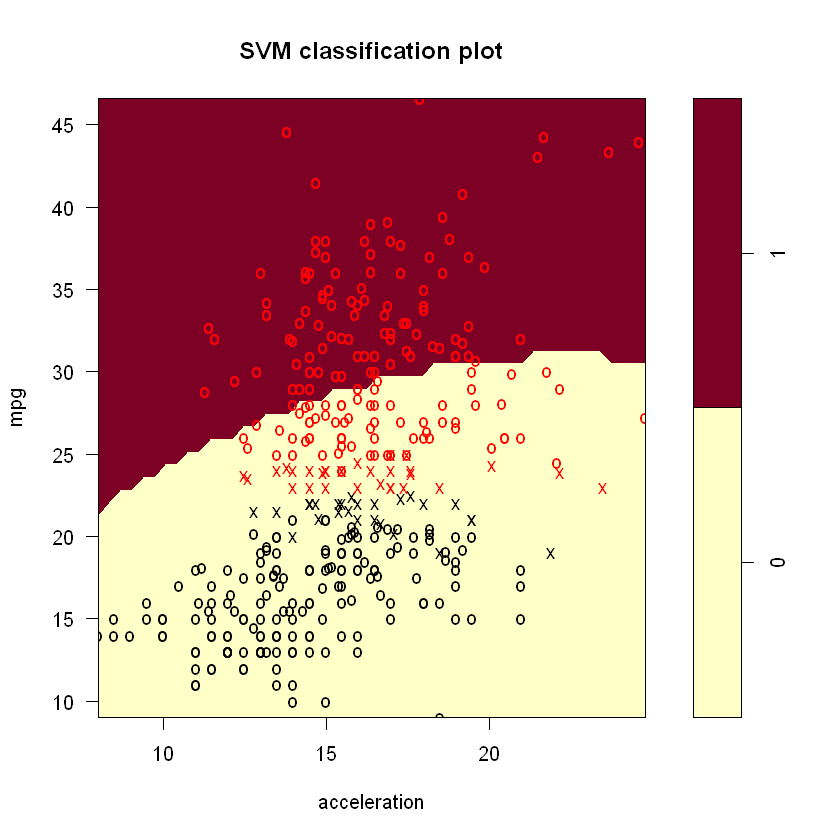

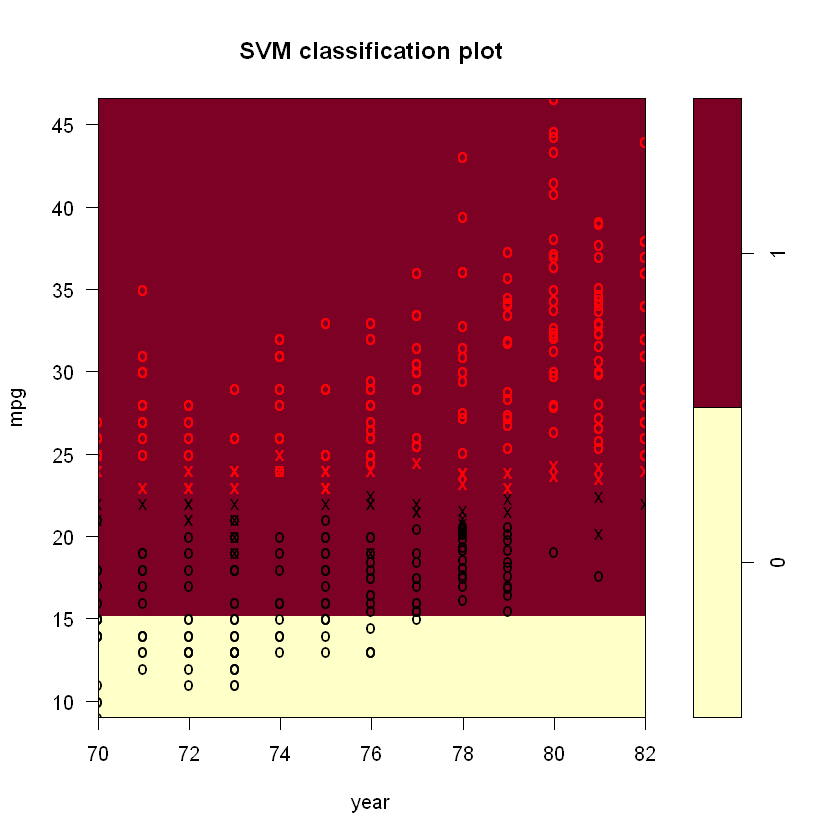

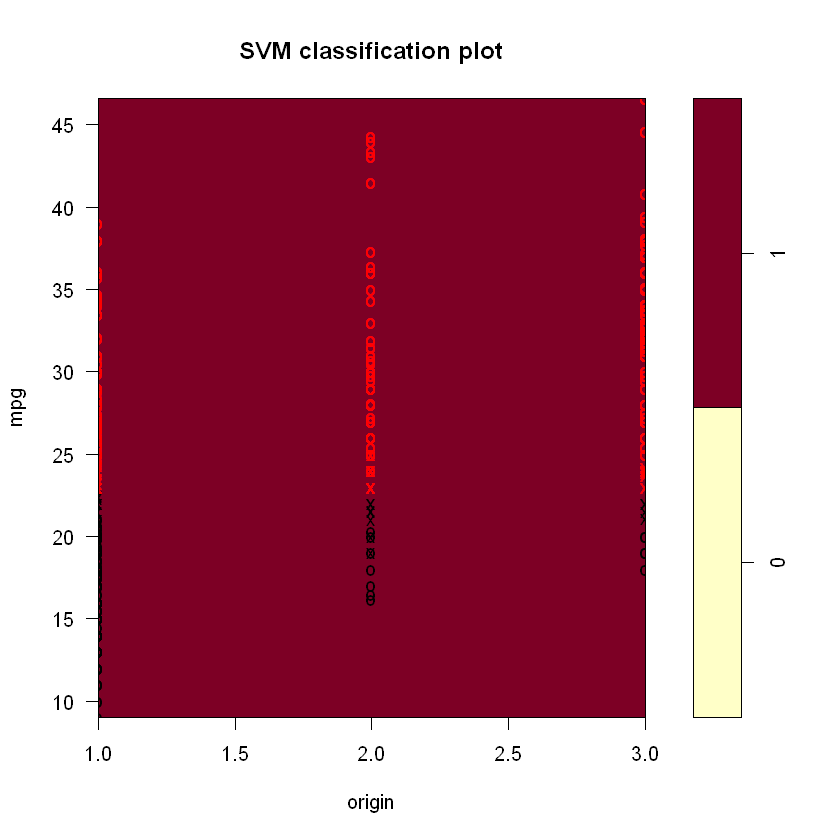

In [37]:
plotpairs(svm.radial)

In [38]:
#8

In [39]:
#a

In [40]:
set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [41]:
#b

In [42]:
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [43]:
#c

In [44]:
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 420  65
  MM  75 240

In [45]:
(78 + 55) / (439 + 228 + 78 + 55)

[1] 0.16625

In [46]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  33  69

In [47]:
(31 + 18) / (141 + 80 + 31 + 18)

[1] 0.1814815

In [48]:
#d

In [49]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 1.778279

- best performance: 0.1675 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17625 0.04059026
2   0.01778279 0.17625 0.04348132
3   0.03162278 0.17125 0.04604120
4   0.05623413 0.17000 0.04005205
5   0.10000000 0.17125 0.04168749
6   0.17782794 0.17000 0.04090979
7   0.31622777 0.17125 0.04411554
8   0.56234133 0.17125 0.04084609
9   1.00000000 0.17000 0.04090979
10  1.77827941 0.16750 0.03782269
11  3.16227766 0.16750 0.03782269
12  5.62341325 0.16750 0.03545341
13 10.00000000 0.17000 0.03736085


In [50]:
#e

In [51]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 423  62
  MM  69 246

In [52]:
(71 + 56) / (438 + 235 + 71 + 56)

[1] 0.15875

In [53]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 156  12
  MM  29  73

In [54]:
(32 + 19) / (140 + 79 + 32 + 19)

[1] 0.1888889

In [55]:
#f

In [56]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [57]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  44
  MM  77 238

In [58]:
(77 + 39) / (455 + 229 + 77 + 39)

[1] 0.145

In [59]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

In [60]:
(28 + 18) / (141 + 83 + 28 + 18)

[1] 0.1703704

In [61]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1725 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39375 0.03240906
2   0.01778279 0.39375 0.03240906
3   0.03162278 0.34750 0.05552777
4   0.05623413 0.19250 0.03016160
5   0.10000000 0.19500 0.03782269
6   0.17782794 0.18000 0.04048319
7   0.31622777 0.17250 0.03809710
8   0.56234133 0.17500 0.04124790
9   1.00000000 0.17250 0.03162278
10  1.77827941 0.17750 0.03717451
11  3.16227766 0.18375 0.03438447
12  5.62341325 0.18500 0.03717451
13 10.00000000 0.18750 0.03173239


In [62]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [63]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  44
  MM  77 238

In [64]:
(77 + 39) / (455 + 229 + 77 + 39)

[1] 0.145

In [65]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

In [66]:
(28 + 18) / (141 + 83 + 28 + 18)

[1] 0.1703704

In [67]:
#g

In [68]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [69]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 449  36
  MM 110 205

In [70]:
(105 + 33) / (461 + 201 + 105 + 33)

[1] 0.1725

In [71]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  45  57

In [72]:
(41 + 10) / (149 + 70 + 41 + 10)

[1] 0.1888889

In [73]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.18 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.03670453
2   0.01778279 0.37000 0.03395258
3   0.03162278 0.36375 0.03197764
4   0.05623413 0.34500 0.03291403
5   0.10000000 0.32125 0.03866254
6   0.17782794 0.24750 0.03322900
7   0.31622777 0.20250 0.04073969
8   0.56234133 0.20250 0.03670453
9   1.00000000 0.19625 0.03910900
10  1.77827941 0.19125 0.03586723
11  3.16227766 0.18000 0.04005205
12  5.62341325 0.18000 0.04133199
13 10.00000000 0.18125 0.03830162


In [74]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  3.162278 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  385

 ( 197 188 )


Number of Classes:  2 

Levels: 
 CH MM




In [75]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 451  34
  MM  90 225

In [76]:
(72 + 44) / (450 + 234 + 72 + 44)

[1] 0.145

In [77]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 154  14
  MM  41  61

In [78]:
(31 + 19) / (140 + 80 + 31 + 19)

[1] 0.1851852

In [79]:
#h

In [80]:
# radial basis kernel produces minimum misclassification error on both train and test data.